In [52]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-paper'])
import numpy as np
import pandas as pd
import json
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
import scipy
import traceback
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

dataset_name_dict = {'Mallat': 0,
 'UWaveGestureLibraryAll': 1,
 'NonInvasiveFetalECGThorax2': 2,
 'MixedShapesRegularTrain': 3,
 'MixedShapesSmallTrain': 4,
 'ECG5000': 5,
 'NonInvasiveFetalECGThorax1': 6,
#  'MoteStrain': 7,
 "StarLightCurves":7,
 'HandOutlines': 8,
 'UWaveGestureLibraryX': 9,
 'CBF': 10,
 'InsectWingbeatSound': 11,
 'UWaveGestureLibraryY': 12,
 'ShapesAll': 13,
 'SonyAIBORobotSurface2': 14,
 'FreezerSmallTrain': 15,
 'Crop':16,
 'ElectricDevices':17}

datasets=dataset_name_dict.keys()

workers=[1, 4, 12, 24, 36, 48, 96]# 1 must be first processed


## KMEANS SPECTRAL

In [16]:
df = pd.read_csv("./kmeans_spectral_quality.csv").dropna(how="all")
df["ID"] = df["ID"].astype(str)

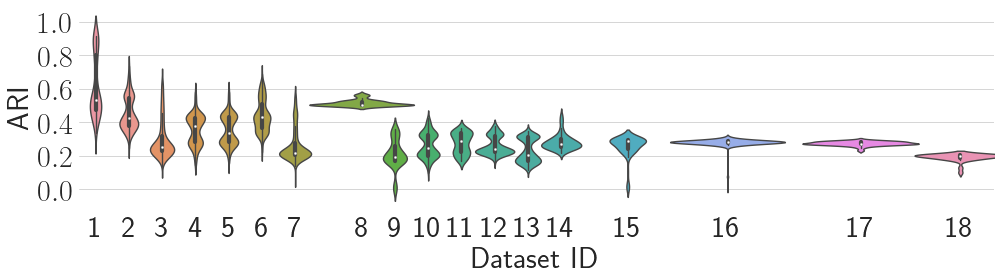

In [18]:
fig, ax = plt.subplots(figsize=(14,4))
sns.set_style("whitegrid")
sns.violinplot(x = "ID", y = "scores", data = df, ax = ax, width=3.5,
               order = [ '1', '2', '3', '4', '5', '6', '7', '', '8', '9', '10', '11', '12',
       '13', '14', '', '15', '','', '16','','','', '17', '','','18'])
ax.set_xlim(-0.5, 27)
# ax.set_ylim(0, 1)
for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(30)
for l in ax.xaxis.get_ticklabels():
    l.set_fontsize(30)
plt.tight_layout()
ax.set_ylabel("ARI", fontsize = 30)
ax.set_xlabel("Dataset ID", fontsize = 30)
# plt.subplots_adjust(left=0.05, bottom=0.05)
plt.tight_layout()
fig.savefig("./figures/violin-new.pdf")

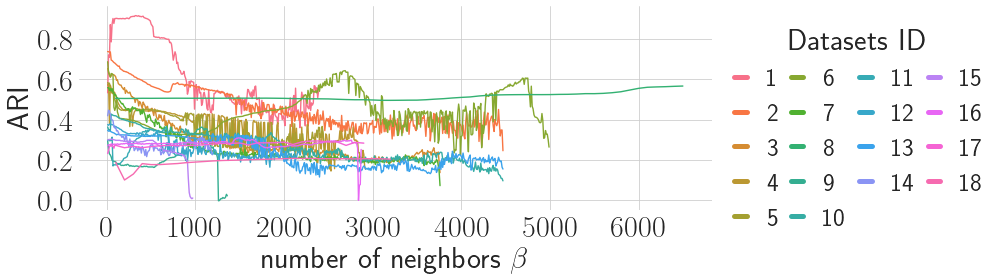

In [19]:
fig, ax = plt.subplots(figsize=(14,4))
sns.set_style("whitegrid")
sns.lineplot(
    x="n-neighbors", 
    y="scores", 
    hue = "ID", 
    data = df)
leg = plt.legend(title='Datasets ID', bbox_to_anchor=([1, 1]),ncol=4, fontsize = 25,handlelength =0.5, columnspacing=0.5, title_fontsize = 30) #
for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(30)
for l in ax.xaxis.get_ticklabels():
#     l.set_visible(True)
    l.set_fontsize(30)
for line in leg.get_lines():
    line.set_linewidth(5.0)
ax.set_ylabel("ARI", fontsize = 30)
ax.set_xlabel(r"number of neighbors $ \beta $", fontsize = 30)
plt.tight_layout()

fig.savefig("./figures/num_neighbor-new.pdf")

## kmeans C

In [53]:
df = pd.read_csv("./kmeans_c.csv").dropna(how="all")
df["ID"] = df["ID"] + 1
df["ID"] = df["ID"].astype(str)

In [54]:
df

,Unnamed: 0,dataset,workers,time,method,speedup,ID,score,info_score,edge_sum,n,median_score,median_info_score,init_time,comp_time
0,0,Mallat,1,1.1261,kmeans_c,1.000000,1,0.706669,0.857934,0,2400,0.786594,0.892693,0.5832,0.5429
1,1,Mallat,4,0.2505,kmeans_c,4.495409,1,0.789931,0.895417,0,2400,0.786594,0.892693,0.1704,0.0801
2,2,Mallat,12,0.1021,kmeans_c,11.029383,1,0.675318,0.836399,0,2400,0.786594,0.892693,0.0738,0.0283
3,3,Mallat,24,0.0538,kmeans_c,20.931227,1,0.705118,0.855860,0,2400,0.786594,0.892693,0.0417,0.0121
4,4,Mallat,36,0.0689,kmeans_c,16.343977,1,0.834959,0.931753,0,2400,0.786594,0.892693,0.0499,0.0190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,ElectricDevices,12,0.3091,kmeans_c,5.519573,18,0.215375,0.201018,0,16160,NaN,NaN,0.0562,0.2529
122,122,ElectricDevices,24,0.1243,kmeans_c,13.725664,18,0.216295,0.194934,0,16160,NaN,NaN,0.0335,0.0908
123,123,ElectricDevices,36,0.1534,kmeans_c,11.121904,18,0.213797,0.201320,0,16160,NaN,NaN,0.0362,0.1172
124,124,ElectricDevices,48,0.0896,kmeans_c,19.041295,18,0.216380,0.194767,0,16160,NaN,NaN,0.0323,0.0573


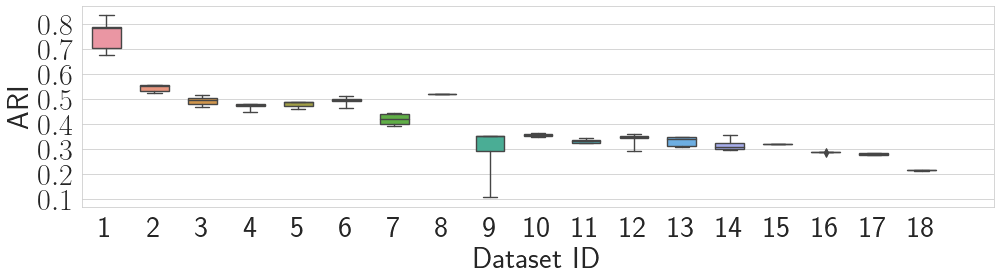

In [56]:
fig, ax = plt.subplots(figsize=(14,4))
sns.set_style("whitegrid")
sns.boxplot(x = "ID", y = "score", data = df, ax = ax, width=0.6, whis = 20,
               order = [ '1', '2', '3', '4', '5', '6', '7',  '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18'])
ax.set_xlim(-0.5, 18.5)
# ax.set_ylim(0, 1)
for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(30)
for l in ax.xaxis.get_ticklabels():
    l.set_fontsize(30)
plt.tight_layout()
ax.set_ylabel("ARI", fontsize = 30)
ax.set_xlabel("Dataset ID", fontsize = 30)
# plt.subplots_adjust(left=0.05, bottom=0.05)
plt.tight_layout()
fig.savefig("./figures/violin-kmeans-c.pdf")

In [31]:
df_kmeans = pd.read_csv("./kmeans.csv").dropna(how="all")
df_kmeans["ID"] = df_kmeans["ID"] + 1
df_kmeans["ID"] = df_kmeans["ID"].astype(str)

In [32]:
scores = pd.concat([df_kmeans, df], ignore_index=True, axis=0)
scores["score"] = scores["score"].astype(float)

In [34]:
scores

,Unnamed: 0,dataset,workers,time,method,speedup,ID,score,info_score,edge_sum,n,init_time,comp_time,median_score
0,0,Mallat,1,0.623028,kmeans,1.000000,1,0.823736,0.916587,0,2400,NaN,NaN,NaN
1,1,Mallat,4,0.359498,kmeans,1.733048,1,0.823736,0.916587,0,2400,NaN,NaN,NaN
2,2,Mallat,12,0.296897,kmeans,2.098465,1,0.823736,0.916587,0,2400,NaN,NaN,NaN
3,3,Mallat,24,0.372364,kmeans,1.673169,1,0.823736,0.916587,0,2400,NaN,NaN,NaN
4,4,Mallat,36,0.377601,kmeans,1.649965,1,0.823736,0.916587,0,2400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,121,ElectricDevices,12,0.309100,kmeans_c,5.519573,18,0.215375,0.201018,0,16160,0.0562,0.2529,0.0
248,122,ElectricDevices,24,0.124300,kmeans_c,13.725664,18,0.216295,0.194934,0,16160,0.0335,0.0908,0.0
249,123,ElectricDevices,36,0.153400,kmeans_c,11.121904,18,0.213797,0.201320,0,16160,0.0362,0.1172,0.0
250,124,ElectricDevices,48,0.089600,kmeans_c,19.041295,18,0.216380,0.194767,0,16160,0.0323,0.0573,0.0


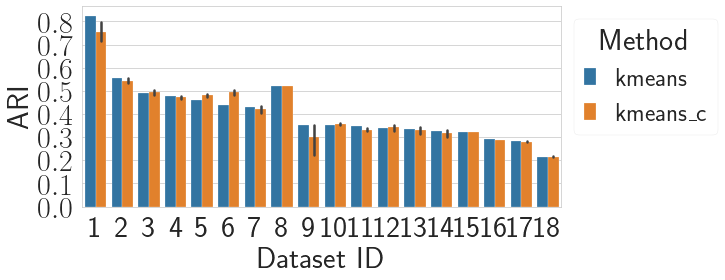

In [51]:
fig, ax = plt.subplots(figsize=(8,4))
bar = sns.barplot(x="ID",
           y="score",
           hue="method", data = scores)
for l in ax.yaxis.get_ticklabels():
    l.set_fontsize(30)
for l in ax.xaxis.get_ticklabels():
    l.set_fontsize(30)
plt.tight_layout()
ax.set_ylabel("ARI", fontsize = 30)
ax.set_xlabel("Dataset ID", fontsize = 30)
leg = plt.legend(title='Method', bbox_to_anchor=([1, 1]), fontsize = 25,handlelength =0.5, columnspacing=0.5, title_fontsize = 30) #

plt.tight_layout()
fig.savefig("./figures/kmeans_ARI_rebuttal.pdf")